In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Import libraries
!pip install -q imbalanced-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
file_path = '/content/drive/MyDrive/creditcard.csv'
df = pd.read_csv(file_path)

In [ ]:
# Load the dataset

# Scale the 'Amount' column, drop 'Time'
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df.drop(['Time'], axis=1, inplace=True)

# Define features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Print class distribution
print("Original class distribution:")
print(y.value_counts())

Original class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# 4. Handle class imbalance using SMOTE
# ============================================
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nAfter SMOTE class distribution:")
print(pd.Series(y_resampled).value_counts())


After SMOTE class distribution:
Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
# 6. Train Models

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1  # use all CPU cores
)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
# 7. Evaluation

print("\n=== Logistic Regression Classification Report ===")
print(classification_report(y_test, log_preds))

print("\n=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_preds))


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     85149
           1       1.00      0.98      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



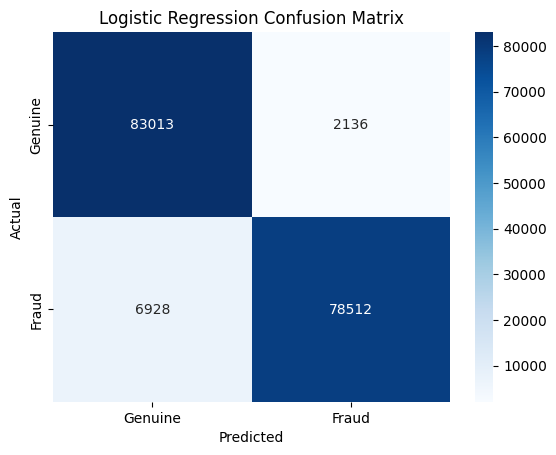

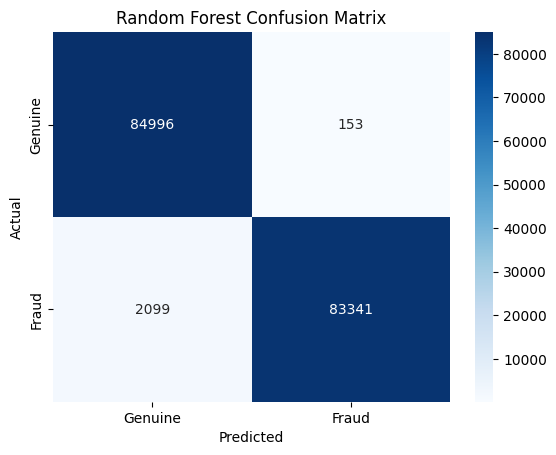

In [ ]:


# ============================================
# 8. Confusion Matrix Plot
# ============================================
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Genuine', 'Fraud'],
                yticklabels=['Genuine', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_test, log_preds, "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")
